In [48]:
# Final Project Scratch

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from itertools import product

In [4]:
music = pd.read_csv('music.csv')

In [5]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [6]:
# Remove columns ID and Name

music = music.drop('id', 1)
music = music.drop('name', 1)

/tmp/ipykernel_6689/2361912282.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  music = music.drop('id', 1)
/tmp/ipykernel_6689/2361912282.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  music = music.drop('name', 1)


In [7]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  release_date      174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  year              17

In [8]:
# Decades Variable

#music.loc[1,1]
#len(music)
music['year'][1201] >= 1930
music.year[1201] >= 1930

music['decade'] = 1

In [9]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  release_date      174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  year              17

In [10]:
for i in range(len(music)):
    if (music.year[i] >= 1920) & (music.year[i] < 1930):
        music['decade'][i] = 1920
    elif (music.year[i] >= 1930) & (music.year[i] < 1940):
        music['decade'][i] = 1930
    elif (music.year[i] >= 1940) & (music.year[i] < 1950):
        music['decade'][i] = 1940
    elif (music.year[i] >= 1950) & (music.year[i] < 1960):
        music['decade'][i] = 1950
    elif (music.year[i] >= 1960) & (music.year[i] < 1970):
        music['decade'][i] = 1960
    elif (music.year[i] >= 1970) & (music.year[i] < 1980):
        music['decade'][i] = 1970
    elif (music.year[i] >= 1980) & (music.year[i] < 1990):
        music['decade'][i] = 1980
    elif (music.year[i] >= 1990) & (music.year[i] < 2000):
        music['decade'][i] = 1990
    elif (music.year[i] >= 2000) & (music.year[i] < 2010):
        music['decade'][i] = 2000
    elif (music.year[i] >= 2010) & (music.year[i] < 2020):
        music['decade'][i] = 2010
    else:
        music['decade'][i] = 2020

/tmp/ipykernel_6689/2075037868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['decade'][i] = 1920
/tmp/ipykernel_6689/2075037868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['decade'][i] = 1930
/tmp/ipykernel_6689/2075037868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['decade'][i] = 1940
/tmp/ipykernel_6689/2075037868.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [11]:
music[['year', 'decade']]

,year,decade
0,1920,1920
1,1920,1920
2,1920,1920
3,1920,1920
4,1920,1920
...,...,...
174384,2020,2020
174385,2021,2020
174386,2020,2020
174387,2021,2020


2010    22455
1990    20328
1970    20118
1980    20074
1950    20000
1960    19610
1940    15493
2000    13782
1930    10764
2020     6134
1920     5631
Name: decade, dtype: int64

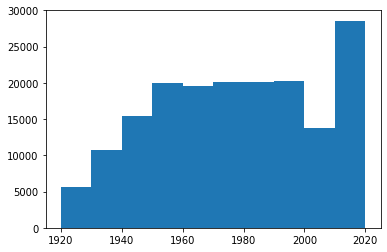

In [12]:
plt.hist(music.decade)
music.decade.value_counts()

2    43768
4    43669
3    43134
1    42737
0     1081
Name: tempo_disc, dtype: int64

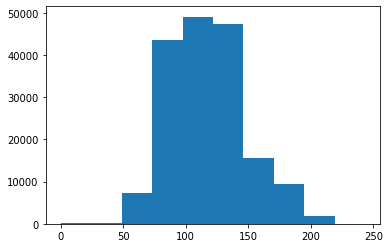

In [13]:
#Tempos
# hist(music$tempo)
# music$tempo_disc <- discretize(music$tempo, method = "cluster", breaks = 5, labels = FALSE)
# music$tempo_disc <- as.factor(music$tempo_disc)
# table(music$temp_disc)

plt.hist(music.tempo)
music["tempo_disc"] = np.digitize(music.tempo, [60, 94, 116, 135])
music["tempo_disc"] = music["tempo_disc"].astype(str)
music.tempo_disc.value_counts()

In [14]:
#Multi Artists
# for (i in 1:nrow(music)) {
#   if (grepl("', '", music$artists[i])) { music$multi_artist[i] <- 1 }
#   else { music$multi_artist[i] <- 0 }
# }
# table(music$multi_artist)

music["multi_artist"] = np.where(("," in music.artists), 1, 0) #I don't know why but this line has to be run before the for loop
for i in range(len(music)):
    if "," in music.artists[i]:
        music.multi_artist[i] = 1
    else:
        music.multi_artist[i] = 0

music.multi_artist = music.multi_artist.astype(str) 
music.multi_artist.value_counts()

/tmp/ipykernel_6689/3859284878.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music.multi_artist[i] = 0
/tmp/ipykernel_6689/3859284878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music.multi_artist[i] = 1


0    136808
1     37581
Name: multi_artist, dtype: int64

In [15]:
# Explicit - make factor
# music$explicit <- as.factor(music$explicit)

music.explicit = music.explicit.astype(str)

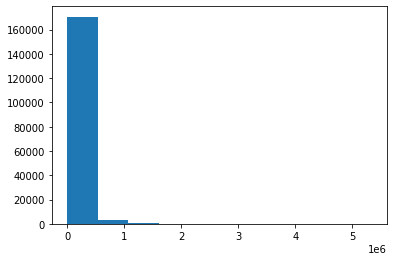

In [16]:
# Duration MS
# hist(music$duration_ms)
# hist(log(music$duration_ms))
# music$log_duration_ms <- log(music$duration_ms)

plt.hist(music.duration_ms)
plt.hist(np.log(music.duration_ms))
music["log_duration_ms"] = np.log(music.duration_ms)

4    44561
3    44086
0    42221
2    27187
1    16334
Name: acousticness_disc, dtype: int64

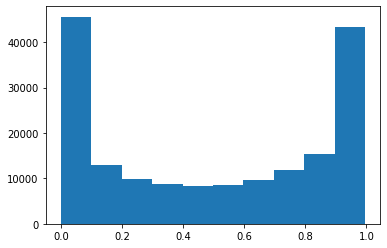

In [17]:
# Acousticness - discretize into 5 bins
# hist(music$acousticness)
# hist(music$acousticness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$acousticness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$acousticness_disc <- discretize(music$acousticness, method = "cluster", breaks = 5, labels = FALSE)
# table(music$acousticness_disc)
# music$acousticness_disc <- as.factor(music$acousticness_disc)

plt.hist(music.acousticness)
music.acousticness.describe()
music["acousticness_disc"] = np.digitize(music.acousticness, [0.08, 0.2, 0.5, 0.89])
music.acousticness_disc = music.acousticness_disc.astype(str)
music.acousticness_disc.value_counts()

4    46678
3    39932
0    39740
2    27905
1    20134
Name: danceability_disc, dtype: int64

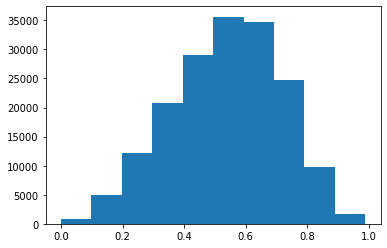

In [18]:
# Danceability - discretize
# hist(music$danceability)
# summary(music$danceability)
# hist(music$danceability, breaks = 20, main = "K-Means")
# abline(v = discretize(music$danceability, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$danceability_disc <- discretize(music$danceability, method = "cluster", breaks = 5, labels = FALSE)
# music$danceability_disc <- as.factor(music$danceability_disc)

plt.hist(music.danceability)
music.danceability.describe()
music["danceability_disc"] = np.digitize(music.danceability, [0.4, 0.47, 0.55, 0.66])
music.danceability_disc = music.danceability_disc.astype(str)
music.danceability_disc.value_counts()

1    42115
2    37296
3    33079
0    32477
4    29422
Name: energy_disc, dtype: int64

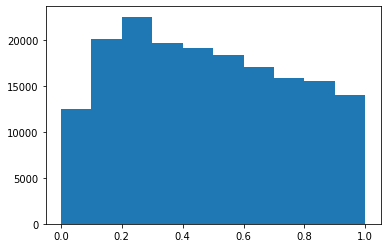

In [19]:
# Energy - transform or discretize
# hist(music$energy)
# library(bestNormalize)
# BNobject <- bestNormalize(music$energy)
# music$energy_trans <- BNobject$x.t
# hist(music$energy_trans)
# hist(music$energy, breaks = 20, main = "K-Means")
# abline(v = discretize(music$energy, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$energy_disc <- discretize(music$energy, method = "cluster", breaks = 5, labels = FALSE)
# music$energy_disc <- as.factor(music$energy_disc)

plt.hist(music.energy)
music.energy.describe()
music["energy_disc"] = np.digitize(music.energy, [0.2, 0.4, 0.6, 0.8])
music.energy_disc = music.energy_disc.astype(str)
music.energy_disc.value_counts()

0    91786
1    31978
4    24535
2    14290
3    11800
Name: instrumentalness_disc, dtype: int64

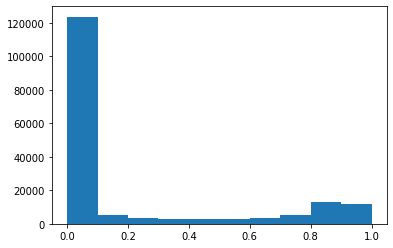

In [20]:
# Instrumentalness - discretize into 5 bins
# hist(music$instrumentalness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$instrumentalness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$instrumentalness_disc <- discretize(music$instrumentalness, method = "cluster", breaks = 5, labels = FALSE)
# music$instrumentalness_disc <- as.factor(music$instrumentalness_disc)

plt.hist(music.instrumentalness)
music.instrumentalness.describe()
music["instrumentalness_disc"] = np.digitize(music.instrumentalness, [0.001, 0.1, 0.5, 0.8])
music.instrumentalness_disc = music.instrumentalness_disc.astype(str)
music.instrumentalness_disc.value_counts()

1    71246
2    42656
3    24118
0    22946
4    13423
Name: liveness_disc, dtype: int64

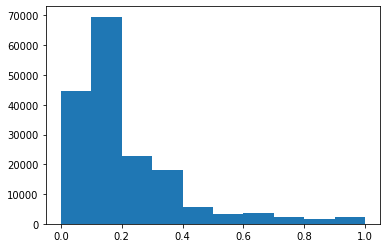

In [21]:
# Key - make factor
# music$key <- as.factor(music$key)

music.key = music.key.astype(str)

# # Liveness - discretize into 5 bins
# hist(music$liveness, breaks = 5)
# table(discretize(music$liveness, method = "cluster", breaks = 5))
# hist(music$liveness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$liveness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$liveness_disc <- discretize(music$liveness, method = "cluster", breaks = 5, labels = FALSE)
# music$liveness_disc <- as.factor(music$liveness_disc)

plt.hist(music.liveness)
music.liveness.describe()
music["liveness_disc"] = np.digitize(music.liveness, [0.08, 0.15, 0.3, 0.5])
music.liveness_disc = music.liveness_disc.astype(str)
music.liveness_disc.value_counts()

3    62359
2    54982
1    27174
0    15712
4    14162
Name: loudness_disc, dtype: int64

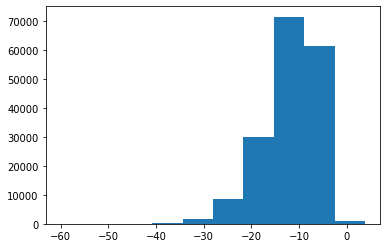

In [22]:
# Loudness - discretize into 5 bins
# hist(music$loudness)
# table(discretize(music$loudness, method = "cluster", breaks = 5))
# hist(music$loudness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$loudness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$loudness_disc <- discretize(music$loudness, method = "cluster", breaks = 5, labels = FALSE)
# music$loudness_disc <- as.factor(music$loudness_disc)

plt.hist(music.loudness)
music.loudness.describe()
music["loudness_disc"] = np.digitize(music.loudness, [-20, -15, -10, -5])
music.loudness_disc = music.loudness_disc.astype(str)
music.loudness_disc.value_counts()

4    44458
3    44443
2    43094
1    26266
0    16128
Name: speechiness_disc, dtype: int64

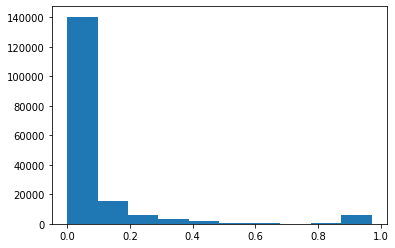

In [23]:
# Speechiness - discretize into 5 bins
# hist(music$speechiness)
# table(discretize(music$speechiness, method = "cluster", breaks = 5))
# hist(music$speechiness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$speechiness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$speechiness_disc <- discretize(music$speechiness, method = "cluster", breaks = 5, labels = FALSE)
# music$speechiness_disc <- as.factor(music$speechiness_disc)

plt.hist(music.speechiness)
music.speechiness.describe()
music["speechiness_disc"] = np.digitize(music.speechiness, [0.03, 0.035, 0.045, 0.075])
music.speechiness_disc = music.speechiness_disc.astype(str)
music.speechiness_disc.value_counts()

4    44447
3    44191
2    42316
0    25567
1    17868
Name: valence_disc, dtype: int64

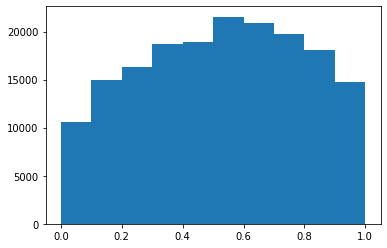

In [24]:
# Valence - discretize into 5 bins
# table(discretize(music$valence, method = "cluster", breaks = 5))
# hist(music$valence, breaks = 20, main = "K-Means")
# abline(v = discretize(music$valence, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$valence_disc <- discretize(music$valence, method = "cluster", breaks = 5, labels = FALSE)
# music$valence_disc <- as.factor(music$valence_disc)

plt.hist(music.valence)
music.valence.describe()
music["valence_disc"] = np.digitize(music.valence, [0.2, 0.31, 0.53, 0.74])
music.valence_disc = music.valence_disc.astype(str)
music.valence_disc.value_counts()

In [25]:
# Mode - factor
# music$mode <- as.factor(music$mode)

music.mode = music["mode"].astype(str)

0    82401
1    61384
2    28398
3     2206
Name: popularity_disc, dtype: int64

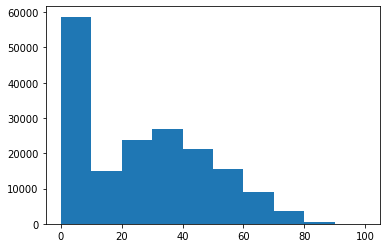

In [32]:
# Popularity - factor w/ 5 levels
# music$popularity_disc <- discretize(music$popularity, method = "interval", breaks = 3, labels = FALSE)
# music$popularity_disc <- as.factor(music$popularity_disc)
# summary(music$popularity)
# table(music$popularity_disc)

plt.hist(music.popularity)
music.popularity.describe()
music["popularity_disc"] = np.digitize(music.popularity, [24, 49, 74])
music.popularity_disc = music.popularity_disc.astype(str)
music.popularity_disc.value_counts()

In [33]:
#Split into 2 datasets: All Numeric, Discretized
# music_raw <- music[which(colnames(music) %in% c("acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness", 
#"key", "liveness", "loudness", "mode", "popularity_disc", "release_date", "speechiness", "tempo", "valence", "year", "multi_artist"))]

# music_disc <- music[which(colnames(music) %in% c("popularity_disc", "decade", "temp_disc", "multi_artist", "log_duration_ms", "danceability_disc", 
#"explicit", "instrumentalness_disc", "key", "liveness_disc", "loudness_disc", "speechiness_disc", "valence_disc", "acousticness_disc", "energy_disc",
#"mode"))]

music_raw = music[["acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness","key", "liveness", "loudness", "mode", 
                   "popularity_disc", "release_date", "speechiness", "tempo", "valence", "year", "multi_artist"]]

music_disc = music[["popularity_disc", "decade", "tempo_disc", "multi_artist", "log_duration_ms", "danceability_disc", "explicit", 
                    "instrumentalness_disc", "key", "liveness_disc", "loudness_disc", "speechiness_disc", "valence_disc", "acousticness_disc", 
                    "energy_disc", "mode"]]

In [37]:
# split into training and holdout
X = music_disc.loc[:, music_disc.columns != 'popularity_disc']
y = music_disc.loc[:, music_disc.columns == 'popularity_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [43]:
#Naive Model
y_test['popularity_disc'].value_counts()
24628/(len(y_test))*100  #47.07456467305082 accuracy

47.07456467305082

In [44]:
# create tuning parameter grid function
def expand_grid(dictionary):
   return pd.DataFrame([i for i in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [49]:
# DECISION TREE
# Create tuning grid for Decision Tree
dictionary = {'criterion': ['entropy','gini'],
             'splitter': ['random','best'],
             'max_depth': [8,10,25]}

grid = expand_grid(dictionary)


# CREATE MODEL
accuracies = []
for i in grid.index:
    dt = DecisionTreeClassifier(criterion = grid.iloc[i,0]  , splitter = grid.iloc[i,1], max_depth = grid.iloc[i,2])

    dt = dt.fit(X_train,y_train)

    accuracies.append(dt.score(X_test,y_test))

    
# CHECK ACCURACIES AND WHICH MODEL IS BEST
dt_accuracies = pd.DataFrame(accuracies)
dt_accuracies = dt_accuracies.rename(columns={0: "accuracy"})
dt_accuracies['criterion'] = grid.iloc[:,0]
dt_accuracies['splitter'] = grid.iloc[:,1]
dt_accuracies['max_depth'] = grid.iloc[:,2]
dt_accuracies

best_dt_model = dt_accuracies.iloc[dt_accuracies['accuracy'].idxmax()]
best_dt_model
# 0.761664 accuracy

accuracy     0.761664
criterion     entropy
splitter       random
max_depth          10
Name: 1, dtype: object

In [50]:
# RANDOM FOREST
# CREATE MODEL

rf = RandomForestRegressor(n_estimators = 2000, random_state = 42, max_features = 'sqrt', bootstrap = True)

rf = rf.fit(X_train,y_train.values.ravel())
    
accuracy = rf.score(X_test,y_test)

best_rf_model = accuracy
best_rf_model
# 0.5487814522196701 accuracy

0.5487814522196701

In [ ]:
## Feature Importance values and plots for RF model
importances_rf = pd.DataFrame({'feature': X.columns,
                            'importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('importance', ascending=False)
importances_rf['cum_importance'] = importances_rf.importance.cumsum()
importances_rf.loc[importances_rf.cum_importance <= .80]

In [ ]:
imp_rf = importances_rf.set_index('feature')
imp_rf.plot(kind='bar');